In [1]:
import pandas as pd
import numpy as np
import glob
import json
import os

In [2]:
# Path folder yang berisi file review Google Maps dalam bentuk file CSV
folder_path_GoogleMaps = '/content/Google Maps'

# Path folder yang berisi file review TripAdvisor dalam bentuk file JSON
folder_path_TripAdvisor_JSON = '/content/TripAdvisor/JSON'

# Path folder yang berisi file review TripAdvisor dalam bentuk file CSV
folder_path_TripAdvisor_CSV = '/content/TripAdvisor/CSV'

# **Sentiment Analysis**

### Dataset Pre-Processing

Import Dataset Google Maps

In [6]:
# Membaca semua file CSV di dalam folder dan menggabungkannya
all_files = glob.glob(os.path.join(folder_path_GoogleMaps, "*.csv"))

if not all_files:
    print("Tidak ada file CSV di dalam folder.")
    gmaps_df = pd.DataFrame(columns=['Nama Akun', 'Waktu Kunjungan', 'Rating', 'Komentar', 'Lokasi Wisata'])
else:
    data_frames = [pd.read_csv(file) for file in all_files]

    # Menggabungkan semua DataFrame menjadi satu
    gmaps_raw_df = pd.concat(data_frames, ignore_index=True)

    # Membuat DataFrame dengan kolom yang diinginkan
    gmaps_df = pd.DataFrame({
      'Nama Akun': gmaps_raw_df['name'],
      'Waktu Kunjungan': gmaps_raw_df['publishedAtDate'],
      'Rating': gmaps_raw_df['stars'],
      'Komentar': gmaps_raw_df.apply(
          lambda row: row['textTranslated'] if pd.notna(row['textTranslated']) and row['textTranslated'].strip() else row['text'],
          axis=1
      ),
      'Lokasi Wisata': gmaps_raw_df['title']
    })

Tidak ada file CSV di dalam folder.


Import Dataset TripAdvisor

In [7]:
# Membaca semua file JSON di dalam folder dan menggabungkannya
all_files_JSON = glob.glob(os.path.join(folder_path_TripAdvisor_JSON, "*.json"))

if not all_files_JSON:
    print("Tidak ada file CSV di dalam folder.")
    tripadvisor_df_JSON = pd.DataFrame(columns=['Nama Akun', 'Waktu Kunjungan', 'Rating', 'Komentar', 'Lokasi Wisata'])
else:
    data_frames = []

    for file in all_files_JSON:
        with open(file, 'r', encoding='utf-8') as f:
            data = json.load(f)
            df = pd.json_normalize(data)
            data_frames.append(df)

    # Menggabungkan semua DataFrame menjadi satu
    tripadvisor_raw_df_JSON = pd.concat(data_frames, ignore_index=True)

    tripadvisor_raw_df_JSON['placeInfo.name'] = np.where(
        (tripadvisor_raw_df_JSON['placeInfo.name'] == "Museum RA Kartini") & (tripadvisor_raw_df_JSON['placeInfo.locationString'] == "Jepara, Central Java, Java"),
        "Museum R.A. Kartini Jepara",
        np.where(
            tripadvisor_raw_df_JSON['placeInfo.name'] == "Museum RA Kartini",
            "Museum R.A. Kartini Rembang",
            tripadvisor_raw_df_JSON['placeInfo.name']
        )
    )

    # Membuat DataFrame dengan kolom yang diinginkan
    tripadvisor_df_JSON = pd.DataFrame({
        'Nama Akun': tripadvisor_raw_df_JSON['user.name'],
        'Waktu Kunjungan': tripadvisor_raw_df_JSON['publishedDate'],
        'Rating': tripadvisor_raw_df_JSON['rating'],
        'Komentar': tripadvisor_raw_df_JSON['text'],
        'Lokasi Wisata': tripadvisor_raw_df_JSON['placeInfo.name']
    })

Tidak ada file CSV di dalam folder.


In [8]:
# Mengambil semua file CSV dalam folder
all_files_CSV = glob.glob(os.path.join(folder_path_TripAdvisor_CSV, "*.csv"))

# Cek apakah ada file CSV dalam folder
if not all_files_CSV:
    print("Tidak ada file CSV di dalam folder.")
    tripadvisor_df_CSV = pd.DataFrame(columns=['Nama Akun', 'Waktu Kunjungan', 'Rating', 'Komentar', 'Lokasi Wisata'])
else:
    # Membaca dan menggabungkan semua file CSV
    data_frames = [pd.read_csv(file) for file in all_files_CSV]
    tripadvisor_raw_df_CSV = pd.concat(data_frames, ignore_index=True)

    # Membuat DataFrame dengan kolom yang diinginkan
    tripadvisor_df_CSV = pd.DataFrame({
        'Nama Akun': tripadvisor_raw_df_CSV['username'],
        'Waktu Kunjungan': tripadvisor_raw_df_CSV['publishedDate'],
        'Rating': tripadvisor_raw_df_CSV['rating'],
        'Komentar': tripadvisor_raw_df_CSV['text'],
        'Lokasi Wisata': tripadvisor_raw_df_CSV['placeName']
    })

    print("Data berhasil digabungkan.")

Tidak ada file CSV di dalam folder.


In [9]:
tripadvisor_df = pd.concat([tripadvisor_df_CSV, tripadvisor_df_JSON], ignore_index=True)

Normalisasi Kolom Lokasi Wisata

In [ ]:
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM SUNAN POJOK ꦩꦏꦩ꧀ꦱꦸꦤꦤ꧀ꦥꦴꦗꦴꦏ꧀", "Makam Sunan Pojok")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Candi Pendem Sengi", "Pendem Sengi Temple")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Gondosuli Temple And Inscription", "Gondosuli Temple")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM GEDONG AGENG Jipang", "Makam Gedong Ageng Jipang")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM SYECH JANGKUNG (SARIDIN) WALIYUALLAH", "Makam Syaikh Jangkung Waliyuallah")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Queen Kalinyamat", "Makam Ratu Kalinyamat")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of R.Ng. Yasadipura I", "Makam R.Ng. Yasadipura I")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Sunan Katong Kaliwungu", "Makam Sunan Katong Kaliwungu")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Sunan Muria", "Makam Sunan Muria")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Waliyyulloh Syeikh Maulana Jumadil Kubro", "Makam Syaikh Maulana Jumadil Kubro")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Makam syech Munadi nyatnyono", "Makam Syaikh Munadi Nyatnyono")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Maqbaroh Syaikh Mutamakkin Waliyyullah", "Makam Syaikh Mutamakkin Waliyyullah")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Museum RA Kartini", "Museum R.A. Kartini Jepara")

In [ ]:
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Banyunibo", "Banyunibo Temple")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Candi Mendut (Temple)", "Mendut Buddhist Monastery")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Candi Pawon", "Pawon Temple")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Demak Great Mosque", "Masjid Agung Demak")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Imogiri Kings Cemetery", "Makam Raja-Raja Imogiri")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Makam Ra Kartini", "Makam Raden Ayu Kartini")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Mataram Kings Cemetery Kotagede", "Makam Raja-Raja Mataram Kotagede")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Menara Kudus Mosque", "Masjid Al-Aqsha Menara Kudus")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Museum Ranggawarsita", "Museum Ronggo Warsito")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Plaosan Temple", "Plaosan Lor Temple")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Sunan Bayat Ki Ageng Pandanaran Cemetery", "Makam Sunan Bayat Ki Ageng Pandanaran")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Sunan Bonang Tomb", "Makam Sunan Bonang Lasem")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Sunan kalijaga Tomb", "Makam Sunan Kalijaga")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Tomb of Sunan Muria", "Makam Sunan Muria")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Yogyakarta Palace", "Keraton Ngayogyakarta Hadiningrat")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Prambanan Temples", "Prambanan Temple")

Melihat list tempat wisata di variable gmaps_df

In [ ]:
unique_values_sorted = sorted(gmaps_df["Lokasi Wisata"].unique())

for i, value in enumerate(unique_values_sorted, start=1):
    print(f"{i}. {value}")

1. Borobudur Temple
2. Prambanan Temple


Melihat list tempat wisata di variable tripadvisor_df

In [ ]:
unique_values_sorted = sorted(tripadvisor_df["Lokasi Wisata"].unique())

for i, value in enumerate(unique_values_sorted, start=1):
    print(f"{i}. {value}")

1. Borobudur Temple
2. Keraton Ngayogyakarta Hadiningrat
3. Prambanan Temple


Menggabungkan Dataset Google Maps dan TripAdvisor

In [ ]:
review_df = pd.concat([gmaps_df, tripadvisor_df], ignore_index=True)

Drop Missing Values dan Duplicate Values

In [ ]:
review_df = review_df.dropna()

In [ ]:
review_df = review_df.drop_duplicates()

Normalisasi Waktu Kunjungan

In [ ]:
from datetime import datetime

# Fungsi normalisasi tanggal
def normalize_date(date):
    try:
        # Coba format pertama (DD/MM/YYYY)
        normalized_date = datetime.strptime(date, "%d/%m/%Y")
    except ValueError:
        try:
            # Coba format kedua (ISO 8601 dengan Z di akhir)
            normalized_date = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%fZ")
        except ValueError:
            try:
                # Coba format kedua (ISO 8601 dengan Z di akhir)
                normalized_date = datetime.strptime(date, "%Y-%m-%d")
            except ValueError:
                try:
                    # Coba format kedua (ISO 8601 dengan Z di akhir)
                    normalized_date = datetime.strptime(date, "%m/%d/%Y")
                except ValueError:
                    # Jika format tidak sesuai, kembalikan tanggal asli
                    return date
    # Format tanggal ke "DD - MM - YYYY"
    return normalized_date.strftime("%d/%m/%Y")

# Terapkan fungsi normalisasi pada kolom 'Waktu Kunjungan'
review_df['Waktu Kunjungan'] = review_df['Waktu Kunjungan'].apply(normalize_date)

Lowercase Kolom Komentar

In [ ]:
review_df["Komentar"] = review_df["Komentar"].str.lower()

Membersihkan Kolom 'Komentar' dari Simbol atau Non-Abjad

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('words')

from nltk.corpus import stopwords, words
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
# Load kata-kata dalam bahasa Inggris
english_words = set(words.words())

def clean_comment(comment):
    # Ubah simbol seperti -, ,, . menjadi spasi dan hapus apapun yang bukan alphabet
    comment = re.sub(r'[^a-zA-Z\s]', ' ', comment)
    comment = comment.lower()  # Ubah menjadi huruf kecil

    # Tokenisasi
    words_in_comment = word_tokenize(comment)

    # Hapus stopwords dan kata yang bukan dalam bahasa Inggris
    valid_words = [word for word in words_in_comment
                   if word in english_words and len(word) > 1]

    # Gabungkan kembali kata-kata yang valid
    return ' '.join(valid_words)

# Terapkan fungsi ke kolom 'Komentar'
review_df['Komentar'] = review_df['Komentar'].apply(clean_comment)

# Hapus baris yang kosong di kolom 'Komentar'
review_df = review_df[review_df['Komentar'].str.strip() != '']

Remove Stopword & Lemmatize

In [ ]:
# Inisialisasi lemmatizer dan stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghapus stopwords dan lemmatization
def preprocess_text(text):
    # Tokenisasi kalimat
    words = word_tokenize(text)
    # Hapus stopwords dan lemmatization
    processed_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return " ".join(processed_words)

# Terapkan pada kolom 'Komentar' di review_df
review_df['Komentar'] = review_df['Komentar'].apply(preprocess_text)

# Hapus baris dengan kolom 'Komentar' yang kosong atau hanya spasi
review_df = review_df[review_df['Komentar'].str.strip().astype(bool)]

Cleaning sudah selesai, simpan ke dalam file baru

In [ ]:
# review_df.to_csv("Dataset Review APIFY.csv", index=False)

Membaca file dataset yang sudah clean

In [ ]:
# review_df = pd.read_csv("/content/Dataset Review APIFY.csv", delimiter=",")

### *Memilih Lokasi Wisata yang ingin di Sentiment Analysis*

List Lokasi Wisata beserta jumlah review nya

In [ ]:
location_counts = review_df["Lokasi Wisata"].value_counts().sort_values(ascending=False)

for i, (value, count) in enumerate(location_counts.items(), start=1):
    print(f"{i}. {value}: {count} Review")

1. Prambanan Temple: 2980 Review
2. Borobudur Temple: 2980 Review
3. Keraton Ngayogyakarta Hadiningrat: 1416 Review


In [ ]:
sentiment_location = 'Prambanan Temple'

In [ ]:
sentiment_df = review_df[review_df['Lokasi Wisata'] == sentiment_location]

### Processing Sentiment using Transformers Library

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
# Specify the model name and revision
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
revision = "main"

# Initialize the pipeline with model and revision
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, revision=revision, truncation=True, max_length=512, return_all_scores=True)

# Define the getPolarity function
def getPolarity(review):
    results = sentiment_pipeline(review)[0]  # Get scores for all labels

    # Map scores to sentiment labels
    label_mapping = {
        "LABEL_2": "Positive",
        "LABEL_1": "Neutral",
        "LABEL_0": "Negative"
    }
    scores = {result['label']: result['score'] for result in results}

    # Determine the highest scoring sentiment label
    sentiment_label = label_mapping[max(scores, key=scores.get)]

    # Calculate the polarity score
    polarity_score = (scores["LABEL_2"] * 1) + (scores["LABEL_1"] * 0) + (scores["LABEL_0"] * -1)

    return sentiment_label, polarity_score

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# Mengaplikasikan function getPolarity untuk setiap review dan menaruhnya ke kolom baru
sentiment_df[["Sentiment", "Polarity"]] = sentiment_df["Komentar"].apply(lambda x: pd.Series(getPolarity(x)))

<ipython-input-73-4fc30c8ad8e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df[["Sentiment", "Polarity"]] = sentiment_df["Komentar"].apply(lambda x: pd.Series(getPolarity(x)))
<ipython-input-73-4fc30c8ad8e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df[["Sentiment", "Polarity"]] = sentiment_df["Komentar"].apply(lambda x: pd.Series(getPolarity(x)))


In [ ]:
bar_chart = sentiment_df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Review').reset_index()

In [ ]:
import matplotlib.pyplot as plt

### Result

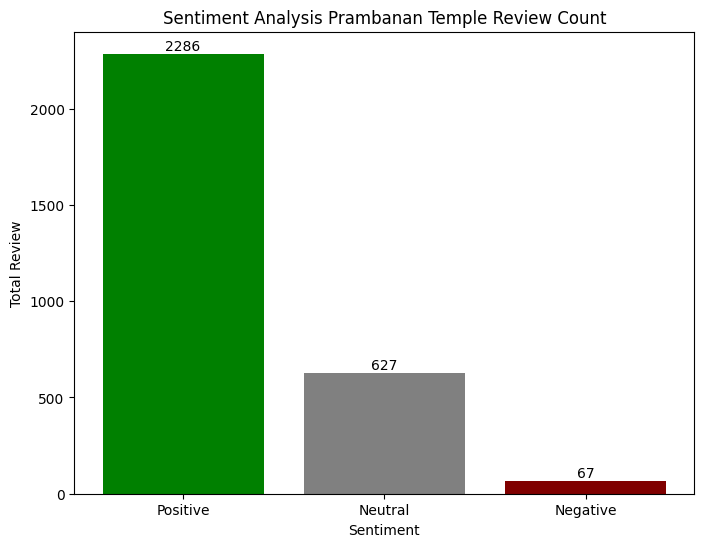

In [ ]:
# Ambil daftar lokasi wisata unik dari sentiment_df
unique_locations = sentiment_df['Lokasi Wisata'].unique()

# Gabungkan lokasi wisata menjadi string dengan koma sebagai pemisah
locations_title = ", ".join(unique_locations)

# Membuat judul dengan lokasi wisata
chart_title = f"Sentiment Analysis {locations_title} Review Count"

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(bar_chart['Sentiment'], bar_chart['Total Review'], color=['green', 'grey', 'maroon'])

# Menambahkan informasi total review di atas setiap bar
for i, total in enumerate(bar_chart['Total Review']):
    plt.text(i, total + 1, str(total), ha='center', va='bottom')

# Menambahkan judul dan label sumbu
plt.title(chart_title)
plt.xlabel('Sentiment')
plt.ylabel('Total Review')

# Menampilkan chart
plt.show()

In [ ]:
# Filter dataset dengan nilai 'Negative' pada kolom 'sentiment'
negative_sentiment_df = sentiment_df[sentiment_df['Sentiment'] == 'Negative']

# Melihat hasil filter
negative_sentiment_df

,Nama Akun,Waktu Kunjungan,Rating,Komentar,Lokasi Wisata,Sentiment,Polarity
397,Yulius Halim,27/12/2024,2,complex designed far got tired provide expensi...,Borobudur Temple,Negative,-0.764320
423,Ralf Meermeier,11/08/2024,3,unless able snatch one limited get inside stru...,Borobudur Temple,Negative,-0.509120
434,Indo Legal Consultants,14/11/2024,4,site amazing time however new ticketing parkin...,Borobudur Temple,Negative,-0.576688
479,"Love,flower,world愛的花花世界",26/01/2025,5,important world cultural heritage visit time t...,Borobudur Temple,Negative,-0.604616
505,yan rezrs,30/01/2025,2,unfortunately parking area really messy parkin...,Borobudur Temple,Negative,-0.730205
...,...,...,...,...,...,...,...
7212,Lbflex,16/04/2016,4,ancient temple one sacred built th th century ...,Borobudur Temple,Negative,-0.535251
7351,Hunebedje,06/03/2016,5,simply one mankind see late building camera ki...,Borobudur Temple,Negative,-0.509760
7365,Wil E,02/03/2016,5,lot amateur illuminating darkness sunrise bit ...,Borobudur Temple,Negative,-0.841720
7370,Barilee Traveling,28/02/2016,2,u rupiah get access single structure costing m...,Borobudur Temple,Negative,-0.603877


In [ ]:
negative_sentiment_df.to_csv("Negative Sentiment Review APIFY.csv", index=False)

# **Network Science**

### Input & Cleaning Dataset

Import Dataset Google Maps

In [ ]:
# Membaca semua file CSV di dalam folder dan menggabungkannya
all_files = glob.glob(os.path.join(folder_path_GoogleMaps, "*.csv"))
data_frames = [pd.read_csv(file) for file in all_files]

# Menggabungkan semua DataFrame menjadi satu
gmaps_raw_df = pd.concat(data_frames, ignore_index=True)

# Membuat DataFrame dengan kolom yang diinginkan
gmaps_df = pd.DataFrame({
    'Nama Akun': gmaps_raw_df['name'],
    'Waktu Kunjungan': gmaps_raw_df['publishedAtDate'],
    'Rating': gmaps_raw_df['stars'],
    'Komentar': gmaps_raw_df.apply(
        lambda row: row['textTranslated'] if pd.notna(row['textTranslated']) and row['textTranslated'].strip() else row['text'],
        axis=1
    ),
    'Lokasi Wisata': gmaps_raw_df['title']
})

Normalisasi Kolom Lokasi Wisata

In [ ]:
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM SUNAN POJOK ꦩꦏꦩ꧀ꦱꦸꦤꦤ꧀ꦥꦴꦗꦴꦏ꧀", "Makam Sunan Pojok")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Candi Pendem Sengi", "Pendem Sengi Temple")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Gondosuli Temple And Inscription", "Gondosuli Temple")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM GEDONG AGENG Jipang", "Makam Gedong Ageng Jipang")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM SYECH JANGKUNG (SARIDIN) WALIYUALLAH", "Makam Syaikh Jangkung Waliyuallah")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Queen Kalinyamat", "Makam Ratu Kalinyamat")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of R.Ng. Yasadipura I", "Makam R.Ng. Yasadipura I")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Sunan Katong Kaliwungu", "Makam Sunan Katong Kaliwungu")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Sunan Muria", "Makam Sunan Muria")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Waliyyulloh Syeikh Maulana Jumadil Kubro", "Makam Syaikh Maulana Jumadil Kubro")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Makam syech Munadi nyatnyono", "Makam Syaikh Munadi Nyatnyono")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Maqbaroh Syaikh Mutamakkin Waliyyullah", "Makam Syaikh Mutamakkin Waliyyullah")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Museum RA Kartini", "Museum R.A. Kartini Jepara")

In [ ]:
review_df = pd.DataFrame(gmaps_df)

In [ ]:
review_df = review_df.drop_duplicates()

### *Filter tempat yang ingin dimasukan kedalam Network Science*

In [ ]:
location_counts = review_df["Lokasi Wisata"].value_counts().sort_values(ascending=False)

for i, (value, count) in enumerate(location_counts.items(), start=1):
    print(f"{i}. {value}: {count} Review")

1. Masjid Al-Aqsha Menara Kudus: 2175 Review
2. Keraton Ngayogyakarta Hadiningrat: 2029 Review
3. Masjid Agung Demak: 1225 Review
4. Makam Raja-Raja Imogiri: 161 Review
5. Pura Pakualaman: 157 Review
6. Makam Sunan Muria: 144 Review
7. Makam Sunan Bayat Ki Ageng Pandanaran: 129 Review
8. Masjid Sunan Kalijaga Kadilangu Demak: 114 Review
9. Pasujudan Sunan Bonang, Makam Putri Champa: 110 Review


In [ ]:
# Filter lokasi wisata yang memiliki 20 review atau lebih
valid_locations = location_counts[location_counts >= 100].index

# Drop baris dengan lokasi wisata yang kurang dari 20 review
review_df = review_df[review_df["Lokasi Wisata"].isin(valid_locations)]

In [ ]:
mataram_hindu_budha = ['Borobudur Temple', 'Banyunibo Temple', 'Prambanan Temple', 'Sewu Temple','Plaosan Lor Temple',
                       'Mendut Buddhist Monastery','Pawon Temple','Ratu Boko Temple','Kalasan Temple','Sojiwan Temple',
                       'Sari Temple','Umbul Temple','Selogriyo Temple','Situs Liyangan','Asu Temple','Pringapus Temple',
                       'Ngawen Temple','Gunungsari Temple','Lumbung Temple','Losari Temple','Gunung Wukir Temple',
                       'Gondosuli Temple','Pendem Sengi Temple']
mataram_islam = ['Masjid Agung Demak', 'Masjid Al-Aqsha Menara Kudus', 'Pura Pakualaman',
                 'Makam Sunan Bayat Ki Ageng Pandanaran', 'Masjid Sunan Kalijaga Kadilangu Demak', 'Pasujudan Sunan Bonang, Makam Putri Champa',
                 'Makam Raja-Raja Mataram Kotagede', 'Makam Sunan Muria', 'Makam Syeikh Maulana Al Maghribi', 'Makam Ratu Kalinyamat',
                 'Situs Makam Sunan Amangkurat Agung', 'Makam Raden Ayu Kartini', 'Makam Syaikh Maulana Jumadil Kubro',
                 'Makam Ki Ageng Selo Tawangharjo Grobogan', 'Makam Joko Tingkir', 'Makam Syaikh Mutamakkin Waliyyullah',
                 'Makam Ronggo Warsito', 'Makam KH Sholeh Darat', 'Makam Syaikh Jangkung Waliyuallah', 'Makam Sunan Prawoto',
                 'Makam Kyai Ageng Kebo Kenongo', 'Makam Sunan Katong Kaliwungu', 'Makam Ki Ageng Pandanaran', 'Makam Handayaningrat Ki Ageng Pengging',
                 'Mbah Sambu (Sayyid Abdurrahman)', 'Masjid Besar Terboyo', 'Makam Sunan Pojok', 'Museum Ronggo Warsito',
                 'Makam Syaikh Munadi Nyatnyono', 'Makam Mbah Kyai Telingsing', 'Makam Mbah Abdul Jalil (Wali Sunan Jepara)',
                 'Makam Sunan Bonang Lasem', 'Makam Sunan Kalijaga']
# masa_kolonial = ['Lokasi A', 'Lokasi B', 'Lokasi C']

In [ ]:
network_df = review_df[review_df['Lokasi Wisata'].isin(mataram_islam)]

In [ ]:
network_df.head(10)

,Nama Akun,Waktu Kunjungan,Rating,Komentar,Lokasi Wisata
20,Menoer Azza,2025-01-21T00:16:05.272Z,5,Thank God we were able to perform Friday praye...,Masjid Agung Demak
21,Titik Pujiyati,2025-01-20T23:48:24.104Z,5,NaN,Masjid Agung Demak
22,Rohim Bintoro,2025-01-20T15:37:52.830Z,5,NaN,Masjid Agung Demak
23,shofyan anshori,2025-01-20T06:46:47.983Z,5,First time sholat jumat in masjid aging demak....,Masjid Agung Demak
24,Aghisna Rahmat,2025-01-19T16:58:11.416Z,5,very cold,Masjid Agung Demak
25,Cahayaaa,2025-01-19T16:02:37.946Z,5,NaN,Masjid Agung Demak
26,Wildan pragneta,2025-01-19T14:06:34.721Z,5,NaN,Masjid Agung Demak
27,Agung Kisnanto,2025-01-19T12:50:33.415Z,5,Good mosque is full of the history of Islamic ...,Masjid Agung Demak
28,Panti Asuhan Sunan Bonang,2025-01-19T04:53:03.793Z,5,NaN,Masjid Agung Demak
29,Nono Pujiono,2025-01-19T00:27:24.530Z,5,NaN,Masjid Agung Demak


### Processing Dataset

Membuat Dataset Pergerakan Wisata dari Dataset Review dengan detail Waktu Kunjungan

In [ ]:
# Step 1: Konversi kolom 'Waktu Kunjungan' ke tipe datetime
network_df['Waktu Kunjungan'] = pd.to_datetime(network_df['Waktu Kunjungan'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Step 2: Urutkan dataset berdasarkan 'Nama Akun' dan 'Waktu Kunjungan'
df_sorted = network_df.sort_values(['Nama Akun', 'Waktu Kunjungan']).drop_duplicates(subset=['Nama Akun', 'Lokasi Wisata'], keep='first')

# Step 3: Menggabungkan destinasi yang dikunjungi dan waktu kunjungannya per "Nama Akun"
# Gabungkan 'Lokasi Wisata' dan 'Waktu Kunjungan' menjadi list tuple untuk setiap 'Nama Akun'
tourism_df = (
    df_sorted.groupby('Nama Akun')[['Lokasi Wisata', 'Waktu Kunjungan']]
    .apply(lambda x: list(zip(x['Lokasi Wisata'], x['Waktu Kunjungan'])))
    .reset_index(name='Kunjungan')
)

# Step 4: Pecah daftar 'Kunjungan' menjadi kolom-kolom dengan format selang-seling: "Destinasi i", "Waktu Kunjungan Destinasi i"
# Buat data frame baru untuk menyimpan destinasi dan waktu kunjungan secara selang-seling
destinasi_waktu_df = pd.DataFrame(tourism_df['Kunjungan'].tolist())

# Buat kolom selang-seling untuk "Destinasi i" dan "Waktu Kunjungan Destinasi i"
combined_columns = {}
for i in range(destinasi_waktu_df.shape[1]):
    combined_columns[f'Destinasi {i+1}'] = destinasi_waktu_df.applymap(lambda x: x[0] if pd.notna(x) else None)[i]
    combined_columns[f'Waktu Kunjungan Destinasi {i+1}'] = destinasi_waktu_df.applymap(lambda x: x[1] if pd.notna(x) else None)[i]

# Gabungkan kolom-kolom ini dengan 'Nama Akun'
tourism_df = pd.concat([tourism_df['Nama Akun'], pd.DataFrame(combined_columns)], axis=1)

# Step 5: Mengurutkan dataframe berdasarkan jumlah destinasi yang dikunjungi
tourism_df['Jumlah Destinasi'] = tourism_df.filter(like='Destinasi').notna().sum(axis=1)
tourism_df = tourism_df.sort_values('Jumlah Destinasi', ascending=False).reset_index(drop=True)

# Hapus kolom 'Jumlah Destinasi' jika tidak ingin ditampilkan
tourism_df = tourism_df.drop(columns=['Jumlah Destinasi'])

# Hanya pertahankan data wisatawan yang mengunjungi lebih dari satu destinasi
tourism_df = tourism_df.dropna(thresh=3)  # thresh=3 mempertahankan baris dengan minimal 3 nilai tidak null (Nama Akun + 2 Destinasi)


<ipython-input-142-39ba29dc7147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df['Waktu Kunjungan'] = pd.to_datetime(network_df['Waktu Kunjungan'], format='%Y-%m-%dT%H:%M:%S.%fZ')
<ipython-input-142-39ba29dc7147>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_columns[f'Destinasi {i+1}'] = destinasi_waktu_df.applymap(lambda x: x[0] if pd.notna(x) else None)[i]
<ipython-input-142-39ba29dc7147>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_columns[f'Waktu Kunjungan Destinasi {i+1}'] = destinasi_waktu_df.applymap(lambda x: x[1] if pd.notna(x) else None)[i]


Membuat Dataset Pergerakan Wisata dari Dataset Review

In [ ]:
# Step 1: Konversi kolom 'Waktu Kunjungan' ke tipe datetime
network_df['Waktu Kunjungan'] = pd.to_datetime(network_df['Waktu Kunjungan'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# Step 2: Urutkan dataset berdasarkan 'Nama Akun' dan 'Waktu Kunjungan'
df_sorted = network_df.sort_values(['Waktu Kunjungan']).drop_duplicates(subset=['Nama Akun', 'Lokasi Wisata'], keep='first')

# Step 3: Menggabungkan destinasi yang dikunjungi per "Nama Akun" menjadi kolom-kolom bertahap
# Gunakan fungsi groupby untuk mengelompokkan data berdasarkan 'Nama Akun' dan urutkan kunjungan
tourism_df = (
    df_sorted.groupby('Nama Akun')['Lokasi Wisata']
    .apply(lambda x: list(x))
    .reset_index()
)

# Buat kolom-kolom untuk setiap destinasi kunjungan dengan penomoran dimulai dari 'Destinasi 1'
destinasi_df = pd.DataFrame(tourism_df['Lokasi Wisata'].tolist())
destinasi_df.columns = [f'Destinasi {i+1}' for i in range(destinasi_df.shape[1])]

# Gabungkan kembali dengan kolom 'Nama Akun'
tourism_df = pd.concat([tourism_df['Nama Akun'], destinasi_df], axis=1)

# Step 4: Mengurutkan dataframe berdasarkan jumlah destinasi yang dikunjungi
tourism_df['Jumlah Destinasi'] = tourism_df.drop(columns=['Nama Akun']).notna().sum(axis=1)
tourism_df = tourism_df.sort_values('Jumlah Destinasi', ascending=False).reset_index(drop=True)

# Hapus kolom 'Jumlah Destinasi' jika tidak ingin ditampilkan
tourism_df = tourism_df.drop(columns=['Jumlah Destinasi'])

# Hanya pertahankan data wisatawan yang mengunjungi lebih dari satu destinasi
tourism_df = tourism_df.dropna(thresh=3)  # thresh=3 mempertahankan baris dengan minimal 3 nilai tidak null (Nama Akun + 2 Destinasi)

<ipython-input-143-4eadd0795b58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df['Waktu Kunjungan'] = pd.to_datetime(network_df['Waktu Kunjungan'], format='%Y-%m-%dT%H:%M:%S.%fZ')


In [ ]:
tourism_df.head(100)

,Nama Akun,Destinasi 1,Destinasi 2,Destinasi 3
0,YAP YUHUU,Pura Pakualaman,Masjid Agung Demak,Masjid Al-Aqsha Menara Kudus
1,Yogi Rahman,Masjid Agung Demak,Masjid Al-Aqsha Menara Kudus,"Pasujudan Sunan Bonang, Makam Putri Champa"
2,Muhammad Nurul Ikromi,Masjid Agung Demak,Masjid Al-Aqsha Menara Kudus,"Pasujudan Sunan Bonang, Makam Putri Champa"
3,Catur Slamet,Masjid Agung Demak,"Pasujudan Sunan Bonang, Makam Putri Champa",Masjid Al-Aqsha Menara Kudus
4,Deden Ues Supriyadi,Masjid Agung Demak,Masjid Sunan Kalijaga Kadilangu Demak,Masjid Al-Aqsha Menara Kudus
...,...,...,...,...
95,Wisudanto “MS”,Masjid Agung Demak,Masjid Sunan Kalijaga Kadilangu Demak,None
96,Nur Aini Rahma,Masjid Al-Aqsha Menara Kudus,Masjid Agung Demak,None
97,Diajeng Hastie,"Pasujudan Sunan Bonang, Makam Putri Champa",Masjid Agung Demak,None
98,Sabar Yayuk,Masjid Agung Demak,Masjid Al-Aqsha Menara Kudus,None


In [ ]:
tourism_df.to_csv("Dataset Tourist Destination APIFY With Waktu Kunjungan.csv", index=False)

### Processing Network Science

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Membuat Edge dan Node Terarah

In [ ]:
edge_data = pd.DataFrame(tourism_df.drop('Nama Akun', axis=1))

In [ ]:
G = nx.DiGraph()  # Gunakan nx.DiGraph() jika graf terarah

# Menambahkan edge dengan bobot
for index, row in edge_data.iterrows():
    # G.add_edge(row['Destinasi 1'],row['Destinasi 2'], weight=row['weight'])

    # List destinasi yang tidak null
    # destinations = [row['Destinasi 1'], row['Destinasi 2'], row['Destinasi 3'], row['Destinasi 4'], row['Destinasi 5'], row['Destinasi 6'], row['Destinasi 7'], row['Destinasi 8'], row['Destinasi 9'], row['Destinasi 10'], row['Destinasi 11'], row['Destinasi 12'], row['Destinasi 13'], row['Destinasi 14'], row['Destinasi 15']]
    # destinations = [row['Destinasi 1'], row['Destinasi 2'], row['Destinasi 3'], row['Destinasi 4'], row['Destinasi 5'], row['Destinasi 6'], row['Destinasi 7'], row['Destinasi 8'], row['Destinasi 9'], row['Destinasi 10'], row['Destinasi 11'], row['Destinasi 12'], row['Destinasi 13'], row['Destinasi 14']]
    # destinations = [row['Destinasi 1'], row['Destinasi 2'], row['Destinasi 3'], row['Destinasi 4'], row['Destinasi 5'], row['Destinasi 6'], row['Destinasi 7'], row['Destinasi 8'], row['Destinasi 9'], row['Destinasi 10'], row['Destinasi 11']]
    # destinations = [row['Destinasi 1'], row['Destinasi 2'], row['Destinasi 3'], row['Destinasi 4'], row['Destinasi 5'], row['Destinasi 6']]
    destinations = [row['Destinasi 1'], row['Destinasi 2'], row['Destinasi 3']]

    # Hanya ambil destinasi yang tidak null
    destinations = [d for d in destinations if pd.notnull(d)]

    # Menambahkan edge antara setiap destinasi yang ada
    for i in range(len(destinations) - 1):
        G.add_edge(destinations[i], destinations[i + 1])  # Menambahkan edge antara destinasi i dan i+1


# Tampilkan beberapa node dan edge
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))

Nodes: ['Pura Pakualaman', 'Masjid Agung Demak', 'Masjid Al-Aqsha Menara Kudus', 'Pasujudan Sunan Bonang, Makam Putri Champa', 'Masjid Sunan Kalijaga Kadilangu Demak', 'Makam Sunan Muria', 'Makam Sunan Bayat Ki Ageng Pandanaran']
Edges: [('Pura Pakualaman', 'Masjid Agung Demak', {}), ('Pura Pakualaman', 'Makam Sunan Bayat Ki Ageng Pandanaran', {}), ('Pura Pakualaman', 'Masjid Al-Aqsha Menara Kudus', {}), ('Masjid Agung Demak', 'Masjid Al-Aqsha Menara Kudus', {}), ('Masjid Agung Demak', 'Pasujudan Sunan Bonang, Makam Putri Champa', {}), ('Masjid Agung Demak', 'Masjid Sunan Kalijaga Kadilangu Demak', {}), ('Masjid Agung Demak', 'Makam Sunan Muria', {}), ('Masjid Agung Demak', 'Makam Sunan Bayat Ki Ageng Pandanaran', {}), ('Masjid Al-Aqsha Menara Kudus', 'Pasujudan Sunan Bonang, Makam Putri Champa', {}), ('Masjid Al-Aqsha Menara Kudus', 'Makam Sunan Bayat Ki Ageng Pandanaran', {}), ('Masjid Al-Aqsha Menara Kudus', 'Masjid Agung Demak', {}), ('Masjid Al-Aqsha Menara Kudus', 'Makam Sunan Mu

In [ ]:
# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menambahkan atribut centrality ke node
for node in G.nodes():
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]

# Simpan graf ke file GEXF dengan centrality sebagai atribut
output_file = "graph_with_centrality.gexf"
nx.write_gexf(G, output_file)

### Degree Centrality

In [ ]:
degree_centrality = nx.degree_centrality(G)

# Mengurutkan degree centrality dari yang terbesar ke terkecil
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Menampilkan hasil yang sudah diurutkan
for node, centrality in sorted_centrality:
    print(f"{node}: {centrality}")

Masjid Al-Aqsha Menara Kudus: 2.0
Masjid Agung Demak: 1.8333333333333333
Makam Sunan Muria: 1.1666666666666665
Makam Sunan Bayat Ki Ageng Pandanaran: 1.1666666666666665
Pasujudan Sunan Bonang, Makam Putri Champa: 1.0
Masjid Sunan Kalijaga Kadilangu Demak: 0.8333333333333333
Pura Pakualaman: 0.6666666666666666


### Betweenness Centrality

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

# Mengurutkan betweenness centrality dari yang terbesar ke terkecil
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Menampilkan hasil yang sudah diurutkan
for node, centrality in sorted_betweenness:
    print(f"{node}: {centrality}")

Masjid Al-Aqsha Menara Kudus: 0.3333333333333333
Masjid Agung Demak: 0.16666666666666666
Makam Sunan Muria: 0.02222222222222222
Makam Sunan Bayat Ki Ageng Pandanaran: 0.01111111111111111
Pura Pakualaman: 0.0
Pasujudan Sunan Bonang, Makam Putri Champa: 0.0
Masjid Sunan Kalijaga Kadilangu Demak: 0.0


### Node Visualization

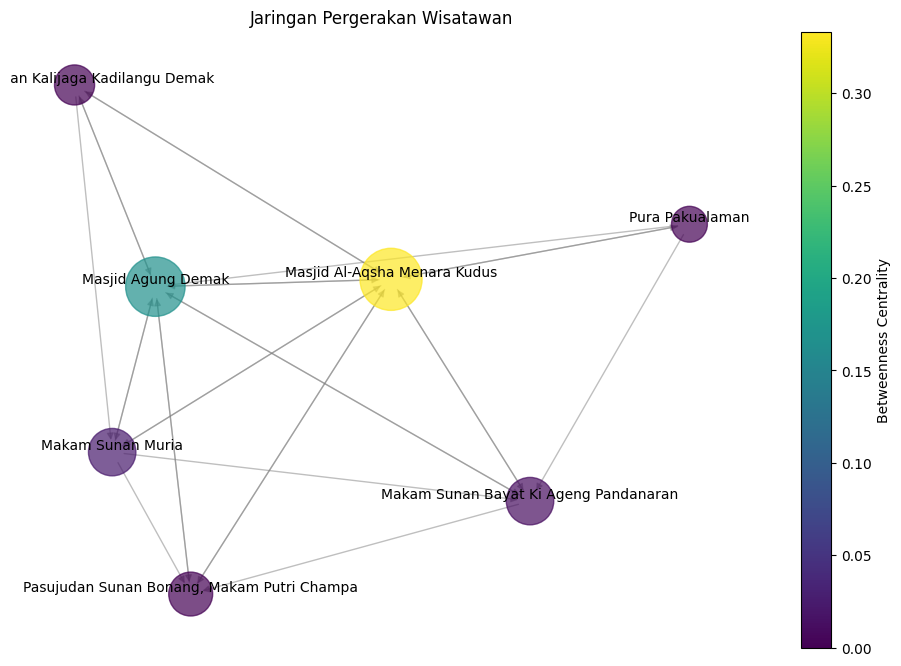

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Tentukan layout untuk node
pos = nx.spring_layout(G, k=0.5, iterations=200)  # Ubah k untuk mempengaruhi jarak antar node

# Menentukan ukuran node berdasarkan degree centrality
node_size = [v * 1000 for v in degree_centrality.values()]

# Menentukan warna node berdasarkan betweenness centrality
node_color = list(betweenness_centrality.values())

plt.figure(figsize=(12, 8))

# Gambar graf
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_size,
    node_color=node_color,
    cmap=plt.cm.viridis,
    alpha=0.7
)

# Gambar edges
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# Tambahkan label pada node
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black', verticalalignment='bottom')

# Buat ScalarMappable untuk colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])  # Diperlukan untuk colorbar

# Tambahkan colorbar ke plot
plt.colorbar(sm, ax=plt.gca(), label='Betweenness Centrality')

# Tambahkan judul dan hilangkan sumbu
plt.title("Jaringan Pergerakan Wisatawan")
plt.axis('off')
plt.show()

### Hub

In [ ]:
# Menentukan threshold atau mengambil N teratas
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Degree Centrality:")
for node, centrality in top_degree:
    print(f"{node}: {centrality}")

print("\nTop 5 Betweenness Centrality:")
for node, centrality in top_betweenness:
    print(f"{node}: {centrality}")

Top 5 Degree Centrality:
Mendut Buddhist Monastery: 2.0
Borobudur Temple: 2.0
Prambanan Temple: 2.0
Ratu Boko Temple: 2.0
Plaosan Lor Temple: 2.0

Top 5 Betweenness Centrality:
Mendut Buddhist Monastery: 0.0
Borobudur Temple: 0.0
Prambanan Temple: 0.0
Ratu Boko Temple: 0.0
Plaosan Lor Temple: 0.0


# **Semantic Network Analysis**

### Pre-Processing Dataset

Import Dataset Google Maps

In [10]:
# Membaca semua file CSV di dalam folder dan menggabungkannya
all_files = glob.glob(os.path.join(folder_path_GoogleMaps, "*.csv"))

if not all_files:
    print("Tidak ada file CSV di dalam folder.")
    gmaps_df = pd.DataFrame(columns=['Nama Akun', 'Waktu Kunjungan', 'Rating', 'Komentar', 'Lokasi Wisata'])
else:
    data_frames = [pd.read_csv(file) for file in all_files]

    # Menggabungkan semua DataFrame menjadi satu
    gmaps_raw_df = pd.concat(data_frames, ignore_index=True)

    # Membuat DataFrame dengan kolom yang diinginkan
    gmaps_df = pd.DataFrame({
      'Nama Akun': gmaps_raw_df['name'],
      'Waktu Kunjungan': gmaps_raw_df['publishedAtDate'],
      'Rating': gmaps_raw_df['stars'],
      'Komentar': gmaps_raw_df.apply(
          lambda row: row['textTranslated'] if pd.notna(row['textTranslated']) and row['textTranslated'].strip() else row['text'],
          axis=1
      ),
      'Lokasi Wisata': gmaps_raw_df['title']
    })

Tidak ada file CSV di dalam folder.


Import Dataset TripAdvisor

In [11]:
# Membaca semua file JSON di dalam folder dan menggabungkannya
all_files_JSON = glob.glob(os.path.join(folder_path_TripAdvisor_JSON, "*.json"))

if not all_files_JSON:
    print("Tidak ada file CSV di dalam folder.")
    tripadvisor_df_JSON = pd.DataFrame(columns=['Nama Akun', 'Waktu Kunjungan', 'Rating', 'Komentar', 'Lokasi Wisata'])
else:
    data_frames = []

    for file in all_files_JSON:
        with open(file, 'r', encoding='utf-8') as f:
            data = json.load(f)
            df = pd.json_normalize(data)
            data_frames.append(df)

    # Menggabungkan semua DataFrame menjadi satu
    tripadvisor_raw_df_JSON = pd.concat(data_frames, ignore_index=True)

    tripadvisor_raw_df_JSON['placeInfo.name'] = np.where(
        (tripadvisor_raw_df_JSON['placeInfo.name'] == "Museum RA Kartini") & (tripadvisor_raw_df_JSON['placeInfo.locationString'] == "Jepara, Central Java, Java"),
        "Museum R.A. Kartini Jepara",
        np.where(
            tripadvisor_raw_df_JSON['placeInfo.name'] == "Museum RA Kartini",
            "Museum R.A. Kartini Rembang",
            tripadvisor_raw_df_JSON['placeInfo.name']
        )
    )

    # Membuat DataFrame dengan kolom yang diinginkan
    tripadvisor_df_JSON = pd.DataFrame({
        'Nama Akun': tripadvisor_raw_df_JSON['user.name'],
        'Waktu Kunjungan': tripadvisor_raw_df_JSON['publishedDate'],
        'Rating': tripadvisor_raw_df_JSON['rating'],
        'Komentar': tripadvisor_raw_df_JSON['text'],
        'Lokasi Wisata': tripadvisor_raw_df_JSON['placeInfo.name']
    })

Tidak ada file CSV di dalam folder.


In [12]:
# Mengambil semua file CSV dalam folder
all_files_CSV = glob.glob(os.path.join(folder_path_TripAdvisor_CSV, "*.csv"))

# Cek apakah ada file CSV dalam folder
if not all_files_CSV:
    print("Tidak ada file CSV di dalam folder.")
    tripadvisor_df_CSV = pd.DataFrame(columns=['Nama Akun', 'Waktu Kunjungan', 'Rating', 'Komentar', 'Lokasi Wisata'])
else:
    # Membaca dan menggabungkan semua file CSV
    data_frames = [pd.read_csv(file) for file in all_files_CSV]
    tripadvisor_raw_df_CSV = pd.concat(data_frames, ignore_index=True)

    # Membuat DataFrame dengan kolom yang diinginkan
    tripadvisor_df_CSV = pd.DataFrame({
        'Nama Akun': tripadvisor_raw_df_CSV['username'],
        'Waktu Kunjungan': tripadvisor_raw_df_CSV['publishedDate'],
        'Rating': tripadvisor_raw_df_CSV['rating'],
        'Komentar': tripadvisor_raw_df_CSV['text'],
        'Lokasi Wisata': tripadvisor_raw_df_CSV['placeName']
    })

    print("Data berhasil digabungkan.")

Tidak ada file CSV di dalam folder.


In [13]:
tripadvisor_df = pd.concat([tripadvisor_df_CSV, tripadvisor_df_JSON], ignore_index=True)

Normalisasi Kolom Lokasi Wisata

In [ ]:
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM SUNAN POJOK ꦩꦏꦩ꧀ꦱꦸꦤꦤ꧀ꦥꦴꦗꦴꦏ꧀", "Makam Sunan Pojok")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Candi Pendem Sengi", "Pendem Sengi Temple")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Gondosuli Temple And Inscription", "Gondosuli Temple")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM GEDONG AGENG Jipang", "Makam Gedong Ageng Jipang")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("MAKAM SYECH JANGKUNG (SARIDIN) WALIYUALLAH", "Makam Syaikh Jangkung Waliyuallah")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Queen Kalinyamat", "Makam Ratu Kalinyamat")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of R.Ng. Yasadipura I", "Makam R.Ng. Yasadipura I")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Sunan Katong Kaliwungu", "Makam Sunan Katong Kaliwungu")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Sunan Muria", "Makam Sunan Muria")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Tomb of Waliyyulloh Syeikh Maulana Jumadil Kubro", "Makam Syaikh Maulana Jumadil Kubro")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Makam syech Munadi nyatnyono", "Makam Syaikh Munadi Nyatnyono")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Maqbaroh Syaikh Mutamakkin Waliyyullah", "Makam Syaikh Mutamakkin Waliyyullah")
gmaps_df["Lokasi Wisata"] = gmaps_df["Lokasi Wisata"].replace("Museum RA Kartini", "Museum R.A. Kartini Jepara")

In [ ]:
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Banyunibo", "Banyunibo Temple")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Candi Mendut (Temple)", "Mendut Buddhist Monastery")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Candi Pawon", "Pawon Temple")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Demak Great Mosque", "Masjid Agung Demak")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Imogiri Kings Cemetery", "Makam Raja-Raja Imogiri")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Makam Ra Kartini", "Makam Raden Ayu Kartini")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Mataram Kings Cemetery Kotagede", "Makam Raja-Raja Mataram Kotagede")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Menara Kudus Mosque", "Masjid Al-Aqsha Menara Kudus")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Museum Ranggawarsita", "Museum Ronggo Warsito")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Plaosan Temple", "Plaosan Lor Temple")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Sunan Bayat Ki Ageng Pandanaran Cemetery", "Makam Sunan Bayat Ki Ageng Pandanaran")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Sunan Bonang Tomb", "Makam Sunan Bonang Lasem")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Sunan kalijaga Tomb", "Makam Sunan Kalijaga")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Tomb of Sunan Muria", "Makam Sunan Muria")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Yogyakarta Palace", "Keraton Ngayogyakarta Hadiningrat")
tripadvisor_df["Lokasi Wisata"] = tripadvisor_df["Lokasi Wisata"].replace("Prambanan Temples", "Prambanan Temple")

Menggabungkan Dataset Google Maps dan TripAdvisor

In [ ]:
review_df = pd.concat([gmaps_df, tripadvisor_df], ignore_index=True)

Drop Missing Values dan Duplicate Values

In [ ]:
review_df = review_df.dropna()

In [ ]:
review_df = review_df.drop_duplicates()

Normalisasi Waktu Kunjungan

In [ ]:
from datetime import datetime

# Fungsi normalisasi tanggal
def normalize_date(date):
    try:
        # Coba format pertama (DD/MM/YYYY)
        normalized_date = datetime.strptime(date, "%d/%m/%Y")
    except ValueError:
        try:
            # Coba format kedua (ISO 8601 dengan Z di akhir)
            normalized_date = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%fZ")
        except ValueError:
            try:
                # Coba format kedua (ISO 8601 dengan Z di akhir)
                normalized_date = datetime.strptime(date, "%Y-%m-%d")
            except ValueError:
                try:
                    # Coba format kedua (ISO 8601 dengan Z di akhir)
                    normalized_date = datetime.strptime(date, "%m/%d/%Y")
                except ValueError:
                    # Jika format tidak sesuai, kembalikan tanggal asli
                    return date
    # Format tanggal ke "DD - MM - YYYY"
    return normalized_date.strftime("%d/%m/%Y")

# Terapkan fungsi normalisasi pada kolom 'Waktu Kunjungan'
review_df['Waktu Kunjungan'] = review_df['Waktu Kunjungan'].apply(normalize_date)

Lowercase Kolom Komentar

In [ ]:
review_df["Komentar"] = review_df["Komentar"].str.lower()

Membersihkan Kolom 'Komentar' dari Simbol atau Non-Abjad

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('words')

from nltk.corpus import stopwords, words
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Load kata-kata dalam bahasa Inggris
english_words = set(words.words())

def clean_comment(comment):
    # Ubah simbol seperti -, ,, . menjadi spasi dan hapus apapun yang bukan alphabet
    comment = re.sub(r'[^a-zA-Z\s]', ' ', comment)
    comment = comment.lower()  # Ubah menjadi huruf kecil

    # Tokenisasi
    words_in_comment = word_tokenize(comment)

    # Hapus stopwords dan kata yang bukan dalam bahasa Inggris
    valid_words = [word for word in words_in_comment
                   if word in english_words and len(word) > 1]

    # Gabungkan kembali kata-kata yang valid
    return ' '.join(valid_words)

# Terapkan fungsi ke kolom 'Komentar'
review_df['Komentar'] = review_df['Komentar'].apply(clean_comment)

# Hapus baris yang kosong di kolom 'Komentar'
review_df = review_df[review_df['Komentar'].str.strip() != '']

Remove Stopword & Lemmatize

In [ ]:
# Inisialisasi lemmatizer dan stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghapus stopwords dan lemmatization
def preprocess_text(text):
    # Tokenisasi kalimat
    words = word_tokenize(text)
    # Hapus stopwords dan lemmatization
    processed_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return " ".join(processed_words)

# Terapkan pada kolom 'Komentar' di review_df
review_df['Komentar'] = review_df['Komentar'].apply(preprocess_text)

Menyimpan File Dataset yang sudah bersih

In [ ]:
review_df.to_csv("Dataset Review APIFY.csv", index=False)

In [ ]:
review_df = pd.read_csv("/content/Dataset Review APIFY.csv", delimiter=",")

In [ ]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

### *Memilih Lokasi Wisata yang ingin di Semantic Analysis*

List Lokasi Wisata beserta jumlah review nya

In [ ]:
location_counts = review_df["Lokasi Wisata"].value_counts().sort_values(ascending=False)

for i, (value, count) in enumerate(location_counts.items(), start=1):
    print(f"{i}. {value}: {count} Review")

1. Prambanan Temple: 2980 Review
2. Borobudur Temple: 2980 Review
3. Keraton Ngayogyakarta Hadiningrat: 1416 Review


In [ ]:
semantic_location = 'Borobudur Temple'
word_count = 10
except_word = {"get", "time", "go", "see", "one", "visit", "around", "also", "people", "take", "place", "day", "ticket", "still"}

### Semantic Network Analysis

In [ ]:
# 1. Filter ulasan untuk Lokasi Wisata yang dipilih
semantic_df = review_df[review_df["Lokasi Wisata"] == semantic_location]["Komentar"]

# 2. Tokenisasi manual (karena dataset sudah bersih)
# Mengonversi setiap ulasan menjadi daftar kata
tokenized_reviews = semantic_df.apply(lambda x: x.split())

# 3. Hitung frekuensi setiap kata
all_words = [word for tokens in tokenized_reviews for word in tokens if word not in except_word]
word_frequency = Counter(all_words)

# Ambil kata teratas berdasarkan frekuensi
top_words = {word for word, freq in word_frequency.most_common(word_count)}

# 4. Filter co-occurrence hanya untuk kata-kata teratas
filtered_co_occurrence = {}
for tokens in tokenized_reviews:
    # Hanya gunakan kata-kata yang ada di top_words
    filtered_tokens = [word for word in tokens if word in top_words]
    for pair in combinations(set(filtered_tokens), 2):
        pair = tuple(sorted(pair))
        if pair in filtered_co_occurrence:
            filtered_co_occurrence[pair] += 1
        else:
            filtered_co_occurrence[pair] = 1

# 5. Buat jaringan hanya untuk kata-kata teratas
G = nx.Graph()

# Tambahkan edge berdasarkan co-occurrence
for pair, weight in filtered_co_occurrence.items():
    G.add_edge(pair[0], pair[1], weight=weight)

# Tambahkan atribut frekuensi ke node
for node in G.nodes():
    G.nodes[node]['size'] = word_frequency[node]

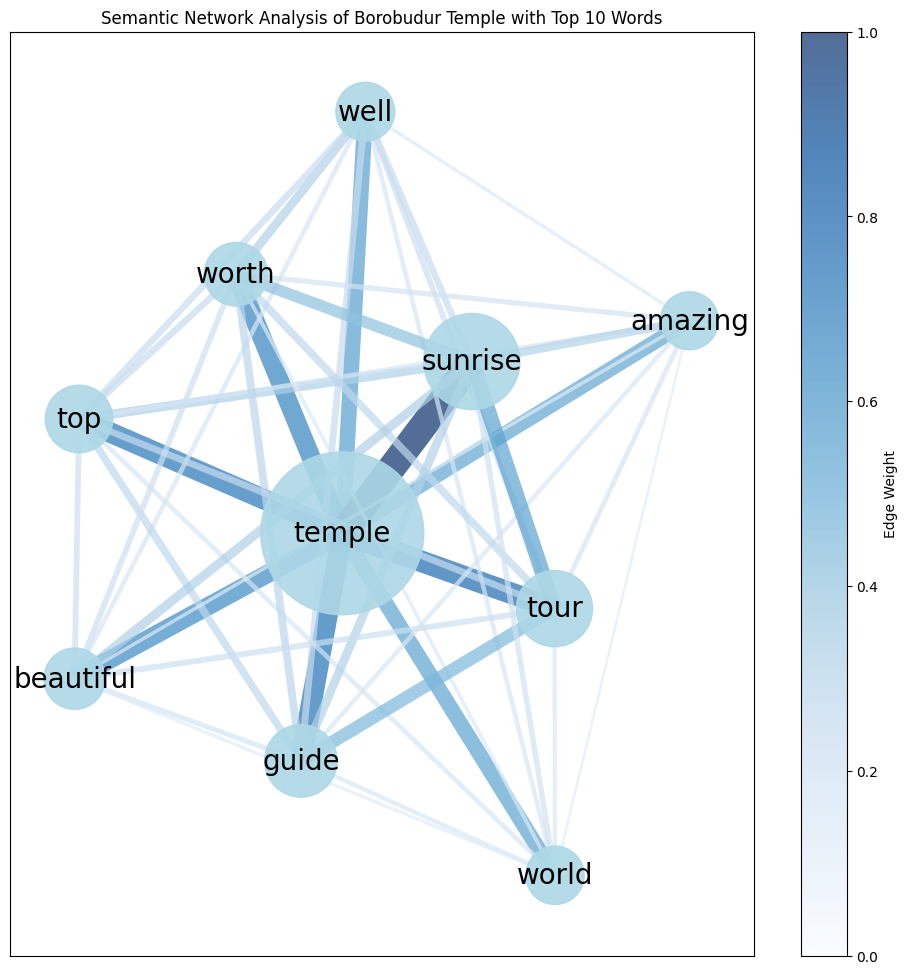

In [ ]:
# Visualisasi Semantic Network dengan Penyesuaian Skala
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)

# Ukuran node berdasarkan frekuensi, diskalakan agar lebih kecil
node_sizes = [G.nodes[node].get('size', 1) * 3 for node in G.nodes()]  # Disesuaikan skala

# Ketebalan edges berdasarkan bobot co-occurrence, diskalakan agar lebih kecil
edge_widths = [G[u][v]['weight'] * 0.03 for u, v in G.edges()]  # Disesuaikan skala

# Kepekatan warna edges berdasarkan bobot (alpha)
max_weight = max(nx.get_edge_attributes(G, 'weight').values())
edge_alphas = [G[u][v]['weight'] / max_weight for u, v in G.edges()]  # Normalisasi bobot

# Visualisasi graf
edges = nx.draw_networkx_edges(
    G, pos, width=edge_widths, alpha=0.7,
    edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=1,
    edge_color=edge_alphas  # Warna sesuai bobot yang dinormalisasi
)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=20, font_color='black')

# Membuat judul dengan lokasi wisata
chart_title = f"Semantic Network Analysis of {semantic_location} with Top {word_count} Words"

plt.title(chart_title)
plt.colorbar(edges, label='Edge Weight')
plt.show()